<a href="https://colab.research.google.com/github/nandinwp/mpv-puc-dataset/blob/main/MPV_PUC_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm

## Transformações númericas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

## Transformações categoricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
url = 'https://raw.githubusercontent.com/nandinwp/mpv-puc-dataset/main/Dataset/AlcoholEffectsOnStudy.csv'

#dataGas = pd.read_csv(url_data,delimiter=';', usecols=label_Atr)
columns = ['UF_VENDA','MUNICIPIO_VENDA','PRINCIPIO_ATIVO','QTD_VENDIDA','UNIDADE_MEDIDA','TIPO_RECEITUARIO','SEXO','IDADE']
dataGas = pd.read_csv(url, delimiter=';',usecols=columns, encoding='ISO-8859-1')
dataGas.head()

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_VENDIDA,UNIDADE_MEDIDA,TIPO_RECEITUARIO,SEXO,IDADE
0,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,1,CAIXA,5.0,1.0,37.0
1,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,1,CAIXA,5.0,1.0,40.0
2,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,2,CAIXA,5.0,1.0,45.0
3,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,5,CAIXA,5.0,2.0,34.0
4,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,1,CAIXA,5.0,2.0,36.0


In [4]:
dataGas.isnull().sum()

UF_VENDA                 0
MUNICIPIO_VENDA          0
PRINCIPIO_ATIVO       4827
QTD_VENDIDA              0
UNIDADE_MEDIDA           0
TIPO_RECEITUARIO         0
SEXO                995525
IDADE               995525
dtype: int64

In [5]:
dataGas.count()

UF_VENDA            2785568
MUNICIPIO_VENDA     2785568
PRINCIPIO_ATIVO     2780741
QTD_VENDIDA         2785568
UNIDADE_MEDIDA      2785568
TIPO_RECEITUARIO    2785568
SEXO                1790043
IDADE               1790043
dtype: int64

In [6]:
qtd_unicos = dataGas['SEXO'].nunique()
print('Quantos tipos de valores tem: '+str(qtd_unicos))
contagem = dataGas['SEXO'].value_counts()
print('Quantidade de 1 e 2: '+str(contagem))


Quantos tipos de valores tem: 2
Quantidade de 1 e 2: 2.0    988994
1.0    801049
Name: SEXO, dtype: int64


<Axes: >

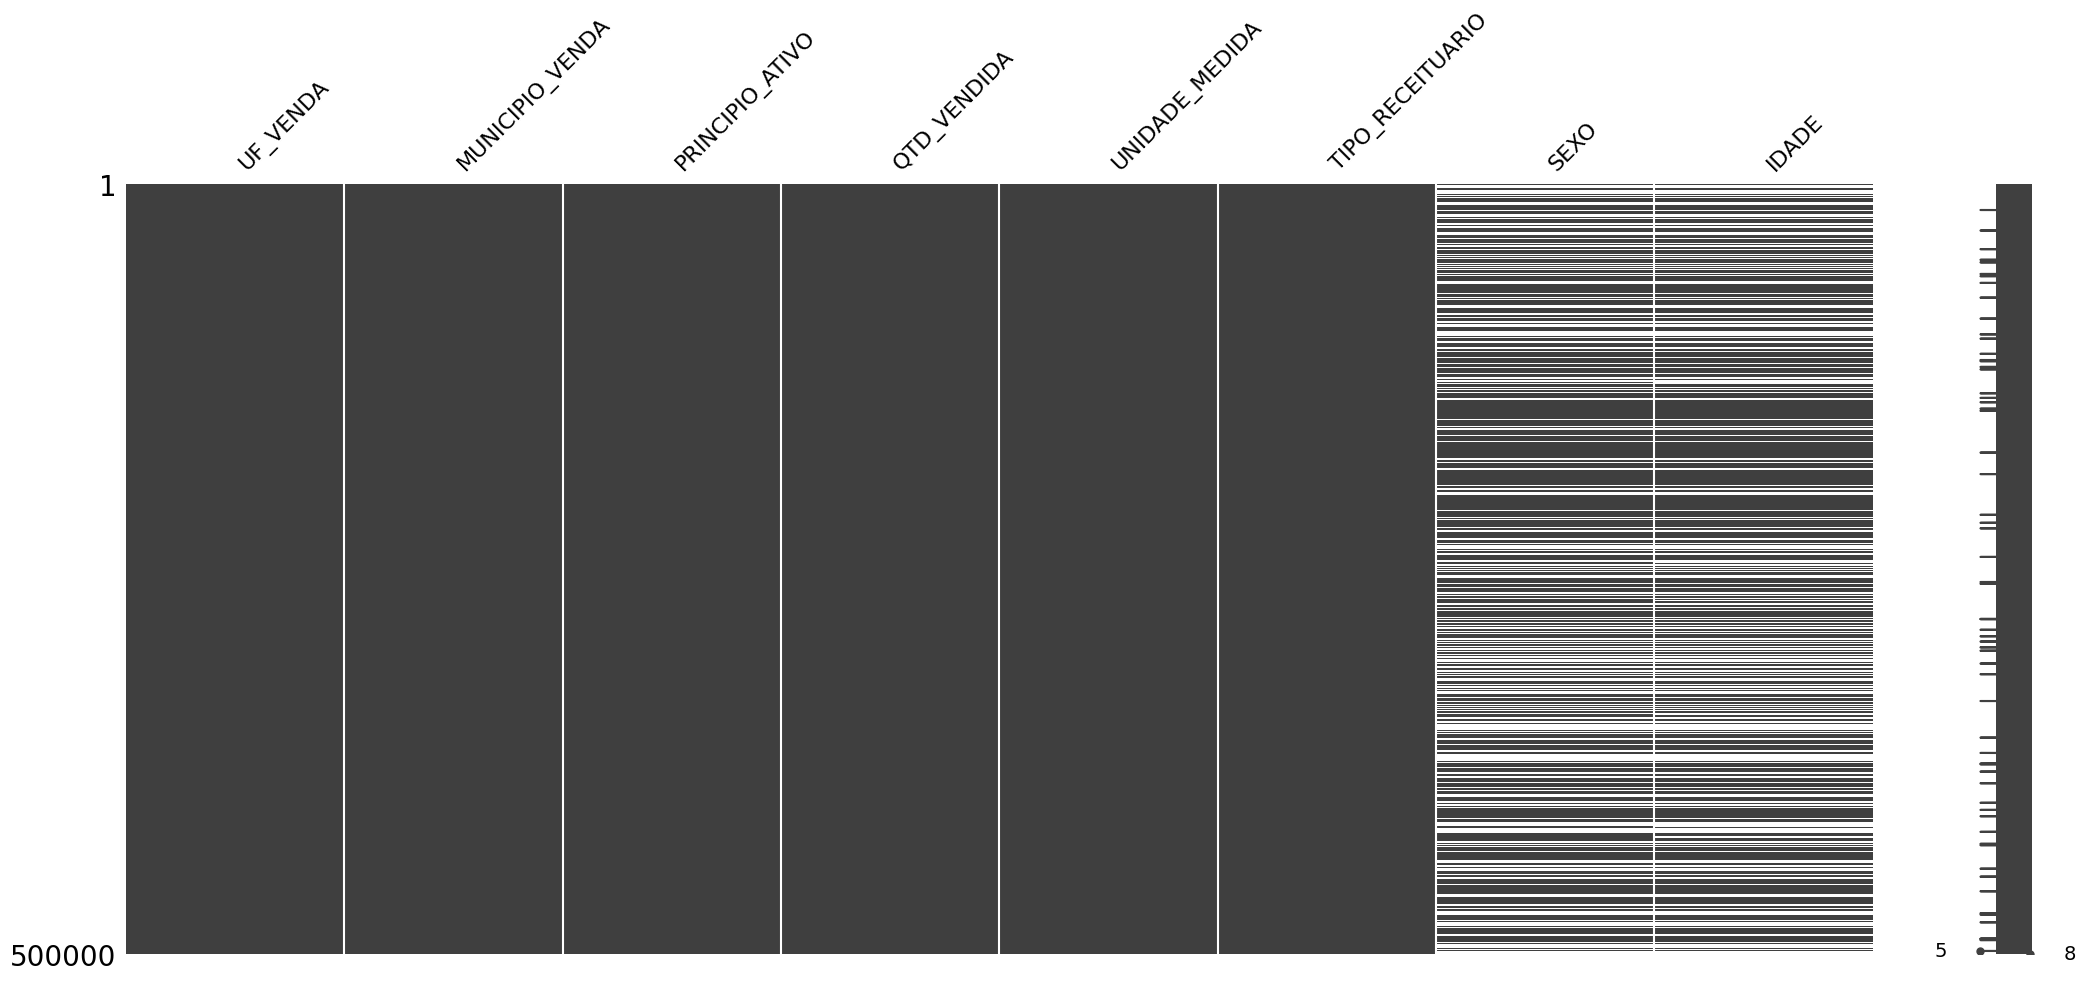

In [7]:
col = list(dataGas.columns)

datagaswithoutMissings = dataGas[col[:]]
datagaswithoutMissings.replace(0,np.nan,inplace=True)
Dataset = datagaswithoutMissings.iloc[:500000]
datagaswithoutMissings = Dataset
ms.matrix(datagaswithoutMissings)

In [8]:
datagaswithoutMissings['PRINCIPIO_ATIVO'].value_counts().idxmax()

'AZITROMICINA DI-HIDRATADA'

<Axes: >

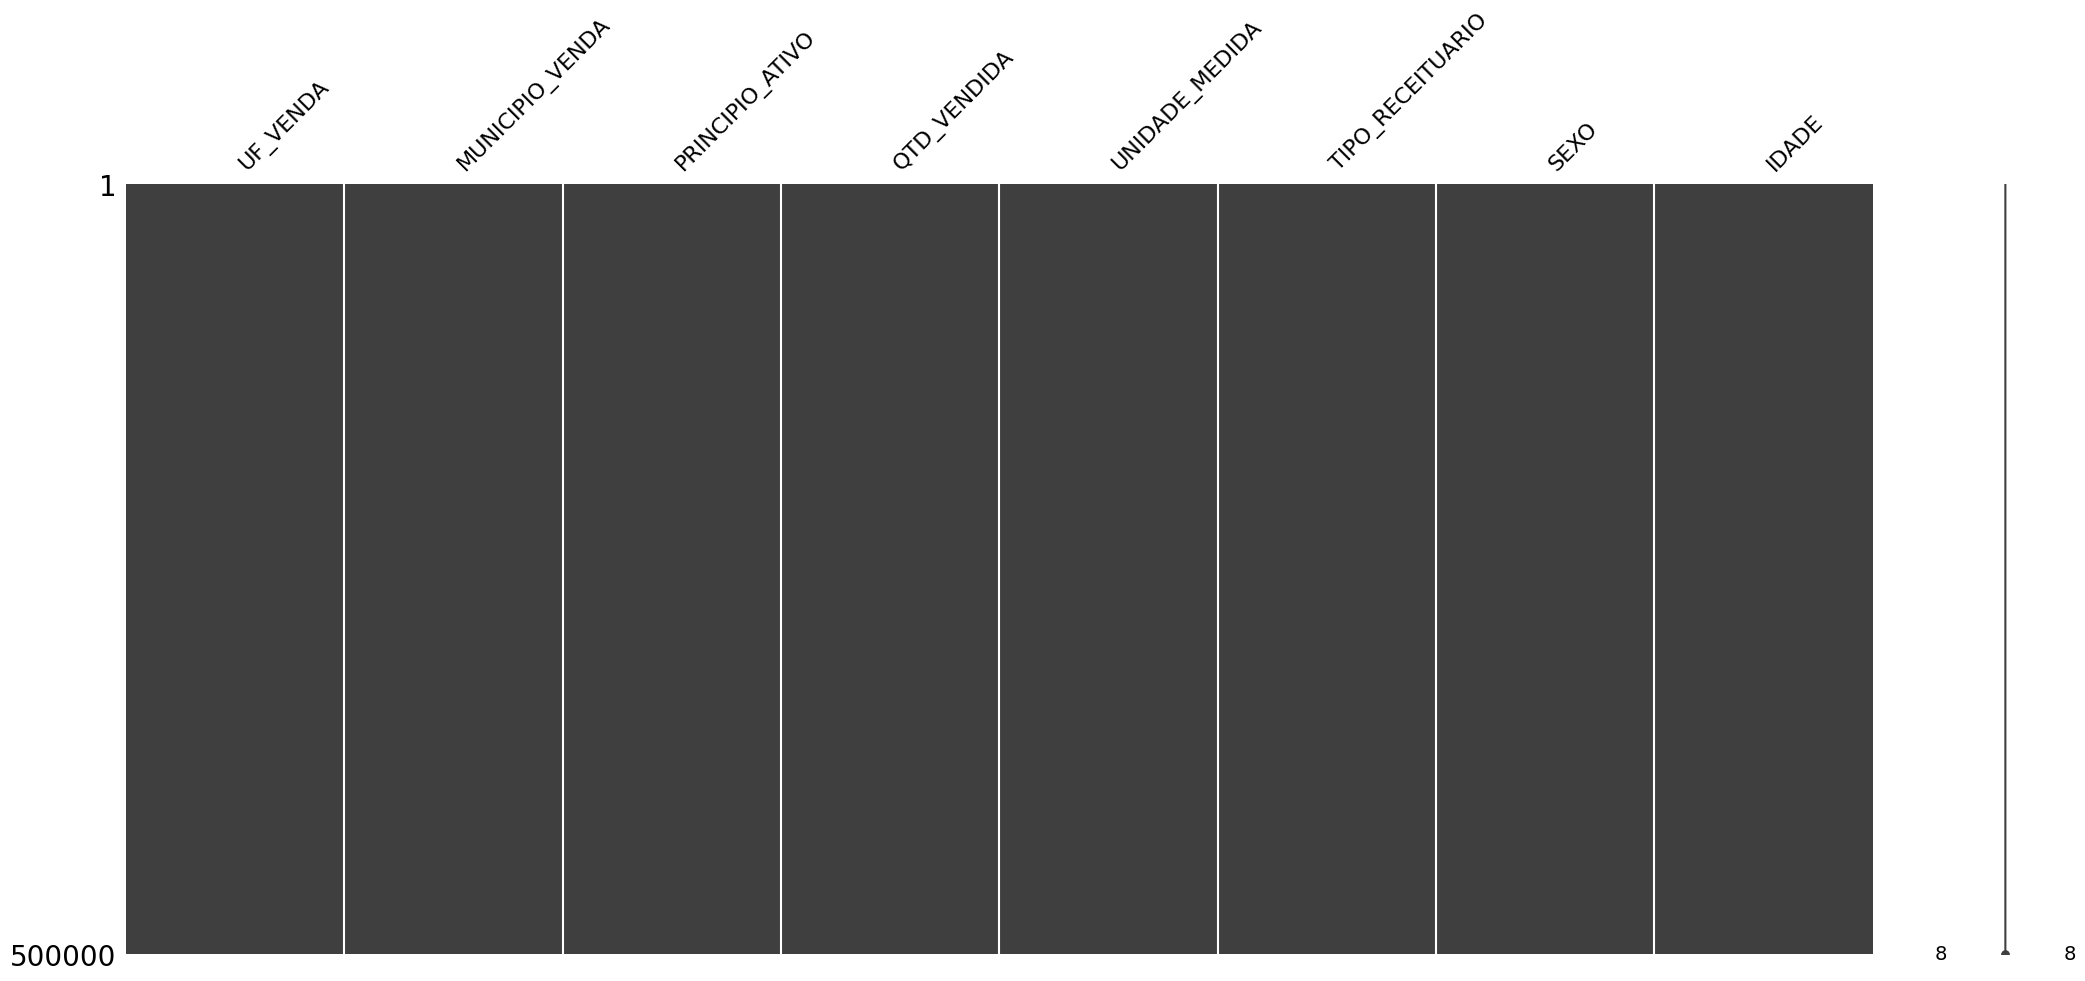

In [9]:
datagaswithoutMissings['SEXO'].fillna(datagaswithoutMissings['SEXO'].median(), inplace=True)
datagaswithoutMissings['IDADE'].fillna(datagaswithoutMissings['IDADE'].median(), inplace=True)
datagaswithoutMissings['PRINCIPIO_ATIVO'].fillna('AZITROMICINA DI-HIDRATADA', inplace=True)

datagaswithoutMissings['SEXO'] = datagaswithoutMissings['SEXO'].replace({1: 'Homem', 2: 'Mulher'})

datagaswithoutMissings['IDADE']=datagaswithoutMissings['IDADE'].astype(int)

ms.matrix(datagaswithoutMissings)

In [10]:
datagaswithoutMissings.shape

(500000, 8)

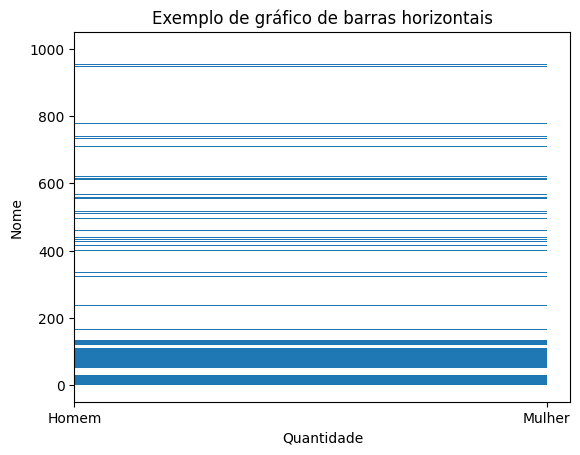

In [15]:
#datagaswithoutMissings.plot(kind = 'density', subplots = True, layout = (2,2), sharex = False, figsize = (20,10))
#plt.show()
plt.barh(datagaswithoutMissings['IDADE'],datagaswithoutMissings['SEXO'])

# Adiciona rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Nome')
plt.title('Exemplo de gráfico de barras horizontais')

# Exibe o gráfico
plt.savefig('grafico.png')  

In [14]:
datagaswithoutMissings.count()

UF_VENDA            500000
MUNICIPIO_VENDA     500000
PRINCIPIO_ATIVO     500000
QTD_VENDIDA         500000
UNIDADE_MEDIDA      500000
TIPO_RECEITUARIO    500000
SEXO                500000
IDADE               500000
dtype: int64